# Group



*   Abdullahil Kafi (group 10)
*   Israt Nowshin (group 10) 
*   Md Zahangir Hossain (group 4)





# MNIST

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import keras  
from tensorflow.keras import datasets, layers, models
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 


5
0
4
1
9
2
1
3
1
4


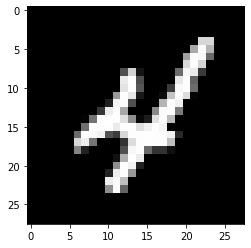

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for i in range(10):
  print(train_labels[i])
  plt.imshow(train_images[i], cmap="Greys_r")

data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(10000)

test_img = tf.data.Dataset.from_tensor_slices(test_images)

In [ ]:
layers = [tf.keras.layers.Conv2D(16,(5,5),activation='relu', input_shape=(28, 28, 1), padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.Conv2D(32,(5,5),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.Conv2D(64,(3,3),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.Conv2D(128,(3,3),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.Conv2D(256,(1,1),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((1,1),padding='SAME',strides=2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(10, activation='softmax')]
model = tf.keras.Sequential(layers)

training_steps = 1000

opt = tf.optimizers.Adam()

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 128)        

In [ ]:
loss=[]
accu=[]
epoch=[]
for step, (img_batch, lbl_batch) in enumerate(data):
  if step > training_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model(img_batch)
    xent = loss_fn(lbl_batch, logits)
  
  varis = model.trainable_variables

  grads = tape.gradient(xent, varis)
  opt.apply_gradients(zip(grads, varis))

  train_acc_metric(lbl_batch, logits)
  if not step % 100:
    print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
    epoch.append(step)
    loss.append(xent)
    accu.append(train_acc_metric.result())
    train_acc_metric.reset_states()

Loss: 2.3023736476898193 Accuracy: 0.140625
Loss: 1.5531845092773438 Accuracy: 0.6114843487739563
Loss: 1.4966011047363281 Accuracy: 0.9303905963897705
Loss: 1.5062586069107056 Accuracy: 0.9494531154632568
Loss: 1.4886724948883057 Accuracy: 0.962109386920929
Loss: 1.484105110168457 Accuracy: 0.9649906158447266
Loss: 1.4969528913497925 Accuracy: 0.9693750143051147
Loss: 1.480741024017334 Accuracy: 0.969531238079071
Loss: 1.480399489402771 Accuracy: 0.9735937714576721
Loss: 1.4854326248168945 Accuracy: 0.9756249785423279
Loss: 1.475803017616272 Accuracy: 0.9752506017684937


I have taken 4 conv layers the accuracy was 70%.
With 5 layers the accuracy increases to 77.8%.

In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9853000044822693


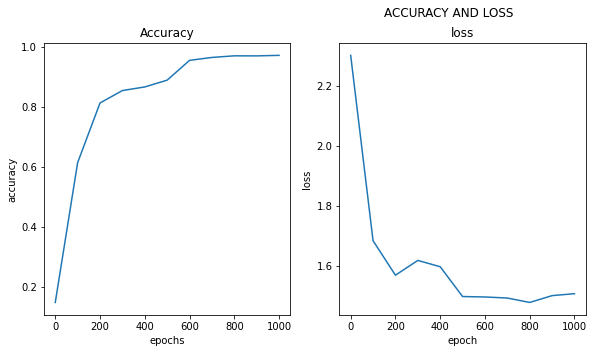

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Accuracy')
plt.plot(epoch,accu)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.subplot(132)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(epoch,loss)
plt.suptitle("ACCURACY AND LOSS")
plt.show()


# CIFAR10

In [ ]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()


data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=30000).batch(128).repeat(3)

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(10000)


layers = [tf.keras.layers.Conv2D(64,(5,5),activation='relu', input_shape=(32, 32, 3), padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Conv2D(128,(5,5),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Conv2D(256,(3,3),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Conv2D(512,(3,3),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Conv2D(1024,(2,2),activation='relu', padding='SAME',kernel_initializer=tf.initializers.RandomUniform(-0.1,0.1)),
          tf.keras.layers.MaxPool2D((2,2),padding='SAME',strides=2),
          tf.keras.layers.BatchNormalization(),

          
          tf.keras.layers.Flatten(),
      
          tf.keras.layers.Dense(10),
          
          ]

model = tf.keras.Sequential(layers)

training_steps = 10000

opt = tf.optimizers.Adam()

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 256)        

In [ ]:
loss=[]
accu=[]
epoch=[]
for step, (img_batch, lbl_batch) in enumerate(data):
  if step > training_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model(img_batch)
    xent = loss_fn(lbl_batch, logits)
  
  varis = model.trainable_variables

  grads = tape.gradient(xent, varis)
  opt.apply_gradients(zip(grads, varis))

  train_acc_metric(lbl_batch, logits)
  if not step % 250:
    print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
    epoch.append(step)
    loss.append(xent)
    accu.append(train_acc_metric.result())
    train_acc_metric.reset_states()


Loss: 4.363375663757324 Accuracy: 0.140625
Loss: 1.3406985998153687 Accuracy: 0.394593745470047
Loss: 1.2981592416763306 Accuracy: 0.5770217776298523
Loss: 0.9130352735519409 Accuracy: 0.6492812633514404
Loss: 0.8504900932312012 Accuracy: 0.7200175523757935


The Accuracy I got here is 68.8%. 


In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.6948000192642212


Test accuracy only around 66%

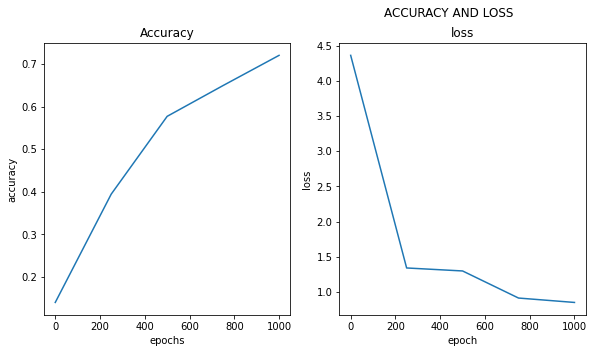

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Accuracy')
plt.plot(epoch,accu)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.subplot(132)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(epoch,loss)
plt.suptitle("ACCURACY AND LOSS")
plt.show()
